# Kent et al. (2004): Table Top tests



- Performed by: Yash Niranjan Poojary
- Reviewed by:
- Last modified : 8th January 2024
- SAFER HBM Version: ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `mpp_d_r12.2.1`


## Experiment by Kent et al. (2004)
### Summary:

The simulated outputs are compared to the references from PMHS tests reported by Kang et al.  <sup>[1]</sup>
1. Kent, R., Lessley, D., & Sherwood, C. (2004). Thoracic response to dynamic, non-impact loading from a hub, distributed belt, diagonal belt, and double diagonal belts. Stapp car crash journal, 48, 495.[Article](https://pubmed.ncbi.nlm.nih.gov/17230280/)

<!-- ![](../_env/setup_kent_S11.JPG) -->
```{figure} ../_env/setup_kent_S11.JPG
---
align: center
---
Table top diagonal belt setup
```



## Experiment

### Information on the subjects/specimens
|    **PMHS ID**   |  145 |  187  |   157  |   186  |  170 |  189 |  190 |   176  |   177  |   182  |   147  |   155  |   173  |  178 |  188 | **Average (SD)** |
|:----------------:|:----:|:-----:|:------:|:------:|:----:|:----:|:----:|:------:|:------:|:------:|:------:|:------:|:------:|:----:|:----:|:----------------:|
|  **Age [years]** |  54  |   54  |   55   |   58   |  75  |  79  |  79  |   85   |   79   |   80   |   63   |   71   |   67   |  73  |  71  |                  |
|      **Sex**     | Male |  Male | Female | Female | Male | Male | Male | Female | Female | Female | Female | Female | Female | Male | Male |    69.5 (10.5)   |
|   **Mass [kg]**  | 87.7 | 112.7 |  74.4  |  61.2  | 65.3 | 56.7 | 73.5 |  58.2  |  47.6  |  65.3  |   45   |  54.4  |  57.2  | 80.7 | 85.3 |     68.3 (17)    |
| **Stature [cm]** |  192 |  178  |   168  |   178  |  178 |  159 |  173 |   157  |   161  |   157  |   161  |   166  |   162  |  182 |  173 |    169.7 (8.5)   |
|      **BMI**     | 23.9 |  35.4 |  26.5  |  19.4  | 20.6 | 22.4 | 24.7 |  23.8  |  18.5  |  26.7  |  17.4  |  19.7  |  21.8  | 24.4 | 28.5 |    23.6 (4.6)    |


### Loading and Boundary Conditions
- Tests on 7 male specimen with average age: 69.3 yrs, average weight: 80.3 kg, average stature: 176.4 cm
### Boundary Conditions
- `Coordinate system `              : aligned with Global in simulations
> **Setup**
> - ***Load case***                     : Diagonal belt loading, X belt loading and hun loading
> - ***Setup***                    : The table and the test rig was modelled based on the given dimensions.
> - ***Contacts***                        : `*CONTACT_AUTOMATIC_SURFACE_TO_SURFACE` with $fs=0.3 , vdc=20, soft=2$ between the HBM and the test rig.
> ```{admonition} Positioning
>:class: important 
>
> - **Belt**:
>   * Engages the clavicle at aprroximately proximal third
>   * Crosses the mid plane approximately at mid-sternum
>   * Exits the bosy laterally approximately superior inferior location of the 9th rib
> - **Hub**:
>   * The center of the hub is located at the intersection of the mid-sagital plane and approximately 4th intercoastal space
>```
> **Constraints and Loading** 
> - ***Loads***            : 
>   * `*BOUNDARY_PRESCRIBED_MOTION_RIGID` define constant displacement rate of Diagonal belt, X belt and hub for subinjurious levels.
>```{admonition} Pre-simulation
>The SAFER HBM model is used in the default seated position. Only gravity load for the first $350 ms$ with defined `GLOBAL_DAMPING`.
>```   


### Responses recorded
- Contact force is measured at the torso and table.
- Chest compression

The reference values from the paper were digitalised and are incuded in the notebook. The data corresponds to the unnormalised corridors.

### Other References
- Larsson K-J, Blennow A, Iraeus J, Pipkorn B, Lubbe N. [Rib cortical bone fracture risk as a function of age and rib strain: Updated injury prediction using finite element human body models](https://www.frontiersin.org/articles/10.3389/fbioe.2021.677768/full). Frontiers in bioengineering and biotechnology. 2021;9:677768.
- Forman J, Kulkarni S, Rapela D, Mukherjee S, Panzer M, Hallman J, editors. [A method for thoracic injury risk function development for human body models](http://www.ircobi.org/wordpress/downloads/irc22/pdf-files/2297.pdf). IRCOBI Conference Porto, Portugal; 2022.



In [2]:
import os
import glob
import numpy as np
# for data analysis
import pandas as pd
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import sys


In [3]:
# Plot formats
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
s11 = {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":2}
pmhsM = {"linestyle" :'--', "color" : 'b',"alpha" : 0.7}
pmhsF = {"linestyle" :'--',"linewidth" :0.5, "color" : 'r',"alpha" : 0.7}
test_corr = {"marker" :'o',"linestyle":'--',"color": 'grey',"alpha" : 1}
Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 150}

# Dataframe formats
def select_col(x):
    mask = x['Overall Score'] <0.5
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[mask,'Overall Score'] = 'color:crimson;font-weight:bold;'
    return df1
heading = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("font-weight", "bold")])]
content={'text-align': 'center'}

In [4]:
binout_path_sim={}
result_output_dir={}

Tests=["03_x_belt"]
# ,"03_x_belt"]
# Tests=["01_hub","02_diagonal_belt","03_x_belt"]

figures_dir = "../data/processed/SAFER_11dd.0/results/figures/"
processed_data_dir = f"../data/processed/SAFER_11dd.0"
experiment_dir= "../data/experiment_data/"

if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)
if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)

for test in Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])


In [5]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [6]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/ID.def","../../model/SAFER_11.0/postprocessing/21_rib_strain_parts.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/post.def","../../model/SAFER_11.0/postprocessing/01_energy_calculation.def"]
                            #  "../../model/SAFER_11.0/postprocessing/20_rib_strain_calculator.def"]

In [7]:
sim_output={}
for test in Tests:
    sim = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim.get_defined_calculation_procedures()
    print(commands)
    for command in sim.get_defined_calculation_procedures():
        sim.calculate(command)
    sim.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")

    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/post.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/ID.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/21_rib_strain_parts.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read rcforc data ...
[READ BINOUT]	done reading rcforc!
[READ BINOUT]	read deforc data ...
[READ BINOUT]	done reading deforc!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[{'visualization': 'IMPACTOR_Contactforce_z_table_to_HBM_torso_CFC_180', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'IMPACTOR_Contactforce_Table_to_HBM_torso_CFC_600', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'IMPACTOR_Chest_deflection_vs_time', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'MODEL_Added_Mass', 'x_label': 'time', 'y_label': 'mass'}, {'visualization': 'MODEL_Total_Energy', 'x_label': 'time', 'y_label': 'energy'},

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: IMPACTOR_Contactforce_Table_to_HBM_torso_CFC_600
[DATA]	read id 99000002m from channel name: z_force
[CALCULATION]	Calculating Visualization: IMPACTOR_Chest_deflection_vs_time
[DATA]	read id 95001311 from channel name: displacement
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11dd.0\03_x_belt
[CALCULATION]	DATA VISUALIZATION d

## Results
### Hub Impact
#### Posterior force vs Chest compression

In [19]:
# Import the data for visualization as pandas Dataframe
experiment_hub=pd.read_csv(os.path.join(experiment_dir ,'Hub.csv'), delimiter=';',na_values='-')

# first 350 seconds used to position model from the standard seated position by gravity loading
simData_hub_offset = pd.DataFrame(sim_output['01_hub']).iloc[350:,:]
simData_hub_offset_defl = simData_hub_offset['IMPACTOR']['Chest_deflection_vs_time']['displacement'] - simData_hub_offset['IMPACTOR']['Chest_deflection_vs_time']['displacement'].iloc[0]
simData_hub_offset_force = simData_hub_offset['IMPACTOR']['Contactforce_z_table_to_HBM_torso_CFC_180']['force'] - simData_hub_offset['IMPACTOR']['Contactforce_z_table_to_HBM_torso_CFC_180']['force'].iloc[0]

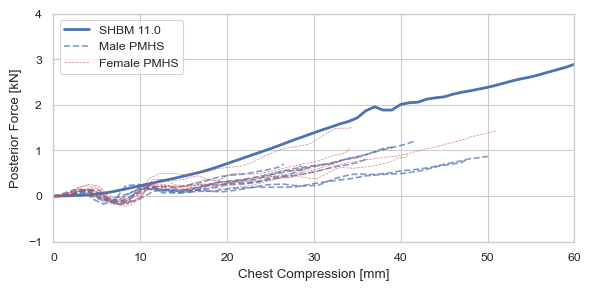

In [21]:
fig_fd, axs = plt.subplots(nrows=1, ncols=1,figsize=(6, 3))

axs.set(ylabel='Posterior Force [kN]',xlabel='Chest Compression [mm]',xlim=[0,60],ylim=[-1,4])
axs.plot(simData_hub_offset_defl, -1*simData_hub_offset_force,**s11,label='SHBM 11.0')
axs.plot(experiment_hub.iloc[:,16], experiment_hub.iloc[:,17]/1000,**pmhsM,label='Male PMHS')
axs.plot(experiment_hub.iloc[:,18::2], experiment_hub.iloc[:,19::2]/1000,**pmhsM)
axs.plot(experiment_hub.iloc[:,0], experiment_hub.iloc[:,1]/1000,**pmhsF,label='Female PMHS')
axs.plot(experiment_hub.iloc[:,2:16:2], experiment_hub.iloc[:,3:16:2]/1000,**pmhsF)
axs.legend()
fig_fd.tight_layout()

#### Energy plot

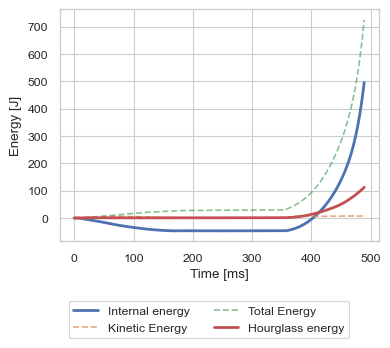

In [9]:
fig_eny, ax = plt.subplots(nrows=1, ncols=1,figsize=(4,3))

ax.plot(sim_output['01_hub'].MODEL.Internal_Energy.time,sim_output['01_hub'].MODEL.Internal_Energy.energy,linewidth=2)
ax.plot(sim_output['01_hub'].MODEL.Kinetic_Energy.time,sim_output['01_hub'].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
ax.plot(sim_output['01_hub'].MODEL.Total_Energy.time,sim_output['01_hub'].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
ax.plot(sim_output['01_hub'].MODEL.Hourglass_Energy.time,sim_output['01_hub'].MODEL.Hourglass_Energy.energy,linewidth=2)
ax.set(xlabel='Time [ms]',ylabel='Energy [J]')
fig_eny.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.9,0),ncols=2);
fig_eny.tight_layout()

#### Rib fracture
- 4 injured PMHS reported out of 18 tests with an average chest deflection of 67.82 mm.
- The four injured tests are tabukate below,

| **PMHS ID** | **Age** | **Sex** | **Rib fractures** | **chest deflection [mm]** |     **test case**      |
| :---------: | :-----: | :-----: | :---------------: | :-----------------------: | :--------------------: |
|     145     |   54    |    M    |         6         |           86.9            | injurious (Final test) |
|     177     |   79    |    F    |        24         |           80.5            | injurious (Final test) |
|     186     |   58    |    F    |         8         |           62.6            | injurious (Final test) |
|     187     |   54    |    M    |         1         |           41.3            |   Non-injurious test   |

In [10]:
# import updated user functions for rib assessment
sys.path.append('../../model/SAFER_11.0/postprocessing/')
from fracture_risk_calculator import HBM_rib_risk

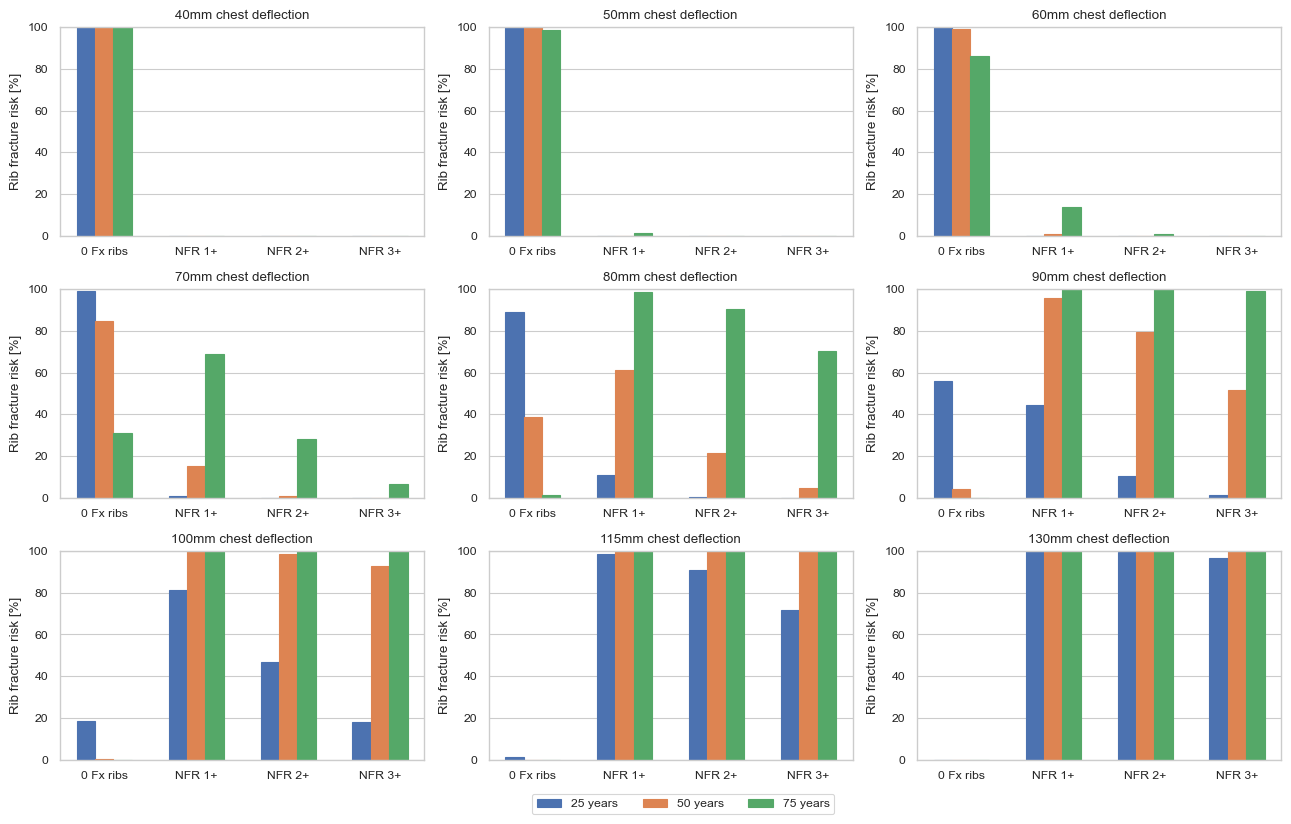

In [16]:
risk_cal=HBM_rib_risk(sim_output)
df_fx=risk_cal.injury_matrix_for_deflection("01_hub",[25,50,75],simData_hub_offset_defl,[40,50,60,70,80,90,100,115,130])

B1={'width' : 0.2 ,'color':'b','alpha':1, 'edgecolor':'b'}
B2={'width' : 0.2 ,'color':'C1','alpha':1, 'edgecolor':'C1'}
B3={'width' : 0.2 ,'color':'g','alpha':1, 'edgecolor':'g'}
deflections=[40,50,60,70,80,90,100,115,130]
fig_ft, axs = plt.subplots(nrows=3, ncols=3,figsize=(13, 8))
i=0
for ax in axs.flat:
    br1 = np.arange(4)
    ax.bar(br1-0.2,df_fx[df_fx.deflection==deflections[i]][df_fx[df_fx.deflection==deflections[i]].age==25].iloc[0,-4:],**B1,label='25 years')
    ax.bar(br1,df_fx[df_fx.deflection==deflections[i]][df_fx[df_fx.deflection==deflections[i]].age==50].iloc[0,-4:],**B2,label='50 years')
    ax.bar(br1+0.2,df_fx[df_fx.deflection==deflections[i]][df_fx[df_fx.deflection==deflections[i]].age==75].iloc[0,-4:],**B3,label='75 years')
    ax.set_xticks(range(4), ['0 Fx ribs','NFR 1+','NFR 2+','NFR 3+'], rotation=0)
    ax.set_ylim([0,100])
    ax.grid(axis='x')
    ax.set(ylabel='Rib fracture risk [%]',title='{}mm chest deflection'.format(deflections[i]))
    i=i+1
fig_ft.legend(["25 years","50 years","75 years"], bbox_to_anchor=(0.65,0.01),ncols=3);
fig_ft.tight_layout()

### Diagonal belt table top test
#### Posterior force vs Chest compression

In [8]:
# Import the data for visualization as pandas Dataframe
experiment_diagonal=pd.read_csv(os.path.join(experiment_dir ,'Belt.csv'), delimiter=';',na_values='-')

# first 350 seconds used to position model from the standard seated position by gravity loading
simData_diagonal_offset = pd.DataFrame(sim_output['02_diagonal_belt']).iloc[350:,:]
simData_diagonal_defl = simData_diagonal_offset['IMPACTOR']['Chest_deflection_vs_time']['displacement'] - simData_diagonal_offset['IMPACTOR']['Chest_deflection_vs_time']['displacement'].iloc[0]
simData_diagonal_force = simData_diagonal_offset['IMPACTOR']['Contactforce_z_table_to_HBM_torso_CFC_180']['force'] - simData_diagonal_offset['IMPACTOR']['Contactforce_z_table_to_HBM_torso_CFC_180']['force'].iloc[0]


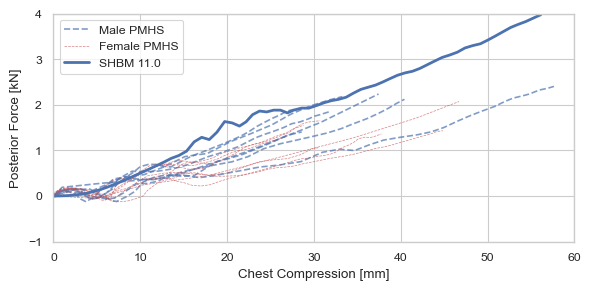

In [10]:
fig_fd, axs = plt.subplots(nrows=1, ncols=1,figsize=(6, 3))

axs.set(ylabel='Posterior Force [kN]',xlabel='Chest Compression [mm]',xlim=[0,60],ylim=[-1,4])
axs.plot(experiment_diagonal.iloc[:,16], experiment_diagonal.iloc[:,17]/1000,**pmhsM,label='Male PMHS')
axs.plot(experiment_diagonal.iloc[:,18::2], experiment_diagonal.iloc[:,19::2]/1000,**pmhsM)
axs.plot(experiment_diagonal.iloc[:,0], experiment_diagonal.iloc[:,1]/1000,**pmhsF,label='Female PMHS')
axs.plot(experiment_diagonal.iloc[:,2:16:2], experiment_diagonal.iloc[:,3:16:2]/1000,**pmhsF)
axs.plot(simData_diagonal_defl, -1*simData_diagonal_force,**s11,label='SHBM 11.0')
axs.legend()
fig_fd.tight_layout()

#### Energy plot

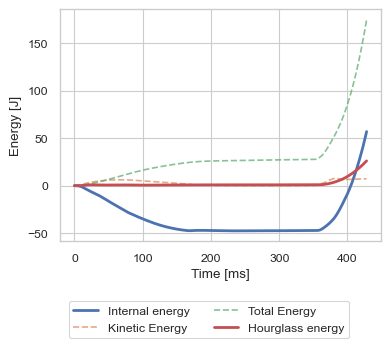

In [12]:
fig_eny, ax = plt.subplots(nrows=1, ncols=1,figsize=(4,3))

ax.plot(sim_output['02_diagonal_belt'].MODEL.Internal_Energy.time,sim_output['02_diagonal_belt'].MODEL.Internal_Energy.energy,linewidth=2)
ax.plot(sim_output['02_diagonal_belt'].MODEL.Kinetic_Energy.time,sim_output['02_diagonal_belt'].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
ax.plot(sim_output['02_diagonal_belt'].MODEL.Total_Energy.time,sim_output['02_diagonal_belt'].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
ax.plot(sim_output['02_diagonal_belt'].MODEL.Hourglass_Energy.time,sim_output['02_diagonal_belt'].MODEL.Hourglass_Energy.energy,linewidth=2)
ax.set(xlabel='Time [ms]',ylabel='Energy [J]')
fig_eny.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.9,0),ncols=2);
fig_eny.tight_layout()

#### Rib fracture
- 11 injured PMHS reported out of 18 tests with an average chest deflection of 49.2 mm (18.6 mm to 90mm).
- The four injured tests are tabukate below,

| **PMHS ID** | **Age** | **Sex** | **Rib fractures** | **chest deflection [mm]** |     **test case**      |
| :---------: | :-----: | :-----: | :---------------: | :-----------------------: | :--------------------: |
|     147     |   63    |    F    |         1         |           28.9            |     Non injurious      |
|     155     |   71    |    F    |         1         |           37.8            |     Non injurious      |
|     170     |   75    |    M    |         1         |           48.9            |     Non injurious      |
|     178     |   73    |    M    |         1         |           57.1            |     Non injurious      |
|     177     |   79    |    F    |         1         |           33.3            |     Non injurious      |
|     176     |   85    |    F    |         8         |           89.4            | injurious (Final test) |
|     182     |   80    |    F    |        22         |           90.0            | injurious (Final test) |
|     157     |   55    |    F    |         1         |           44.8            |     Non injurious      |
|     186     |   58    |    F    |         1         |           18.6            |     Non injurious      |
|     188     |   71    |    M    |         1         |           41.3            |     Non injurious      |
|     187     |   54    |    M    |         1         |           51.3            |     Non injurious      |

In [13]:
# import updated user functions for rib assessment
sys.path.append('../../model/SAFER_11.0/postprocessing/')
from fracture_risk_calculator import HBM_rib_risk

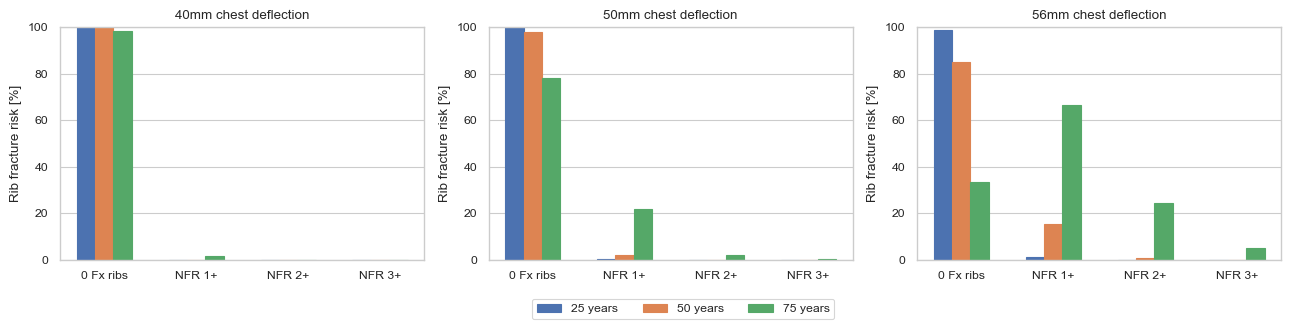

In [16]:
risk_cal=HBM_rib_risk(sim_output)
df_fx=risk_cal.injury_matrix_for_deflection("02_diagonal_belt",[25,50,75],simData_diagonal_defl,[40,50,56])

B1={'width' : 0.2 ,'color':'b','alpha':1, 'edgecolor':'b'}
B2={'width' : 0.2 ,'color':'C1','alpha':1, 'edgecolor':'C1'}
B3={'width' : 0.2 ,'color':'g','alpha':1, 'edgecolor':'g'}
deflections=[40,50,56]
fig_ft, axs = plt.subplots(nrows=1, ncols=3,figsize=(13, 3))
i=0
for ax in axs.flat:    
    if i==5:
        fig_ft.delaxes(ax)
        break;
    br1 = np.arange(4)
    ax.bar(br1-0.2,df_fx[df_fx.deflection==deflections[i]][df_fx[df_fx.deflection==deflections[i]].age==25].iloc[0,-4:],**B1,label='25 years')
    ax.bar(br1,df_fx[df_fx.deflection==deflections[i]][df_fx[df_fx.deflection==deflections[i]].age==50].iloc[0,-4:],**B2,label='50 years')
    ax.bar(br1+0.2,df_fx[df_fx.deflection==deflections[i]][df_fx[df_fx.deflection==deflections[i]].age==75].iloc[0,-4:],**B3,label='75 years')
    ax.set_xticks(range(4), ['0 Fx ribs','NFR 1+','NFR 2+','NFR 3+'], rotation=0)
    ax.set_ylim([0,100])
    ax.grid(axis='x')
    ax.set(ylabel='Rib fracture risk [%]',title='{}mm chest deflection'.format(deflections[i]))
    i=i+1
fig_ft.legend(["25 years","50 years","75 years"], bbox_to_anchor=(0.65,0.01),ncols=3);
fig_ft.tight_layout()

### Double-diagonal belt table top test
#### Posterior force vs Chest compression

In [8]:
# Import the data for visualization as pandas Dataframe
experiment_xbelt=pd.read_csv(os.path.join(experiment_dir ,'Xbelt.csv'), delimiter=';',na_values='-')
# first 350 seconds used to position model from the standard seated position by gravity loading

simData_x_Belt_offset = pd.DataFrame(sim_output['03_x_belt']).iloc[350:,:]
simData_x_Belt_offset_defl = simData_x_Belt_offset['IMPACTOR']['Chest_deflection_vs_time']['displacement'] - simData_x_Belt_offset['IMPACTOR']['Chest_deflection_vs_time']['displacement'].iloc[0]
simData_x_Belt_offset_force = simData_x_Belt_offset['IMPACTOR']['Contactforce_z_table_to_HBM_torso_CFC_180']['force'] - simData_x_Belt_offset['IMPACTOR']['Contactforce_z_table_to_HBM_torso_CFC_180']['force'].iloc[0]

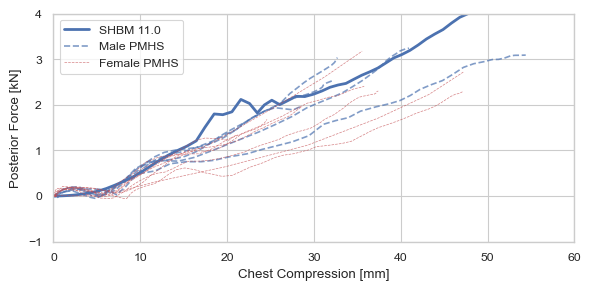

In [10]:
fig_fd, axs = plt.subplots(nrows=1, ncols=1,figsize=(6, 3))

axs.set(ylabel='Posterior Force [kN]',xlabel='Chest Compression [mm]',xlim=[0,60],ylim=[-1,4])
axs.plot(simData_x_Belt_offset_defl, -1*simData_x_Belt_offset_force,**s11,label='SHBM 11.0')

axs.plot(experiment_xbelt.iloc[:,16], experiment_xbelt.iloc[:,17]/1000,**pmhsM,label='Male PMHS')
axs.plot(experiment_xbelt.iloc[:,18::2], experiment_xbelt.iloc[:,19::2]/1000,**pmhsM)
axs.plot(experiment_xbelt.iloc[:,0], experiment_xbelt.iloc[:,1]/1000,**pmhsF,label='Female PMHS')
axs.plot(experiment_xbelt.iloc[:,2:16:2], experiment_xbelt.iloc[:,3:16:2]/1000,**pmhsF)

axs.legend()

fig_fd.tight_layout()

#### Energy plot

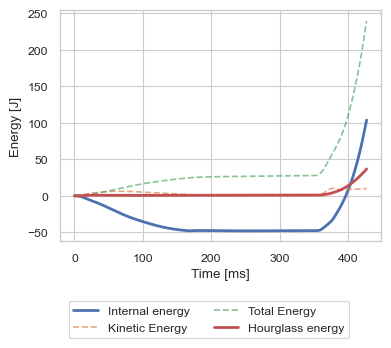

In [12]:
fig_eny, ax = plt.subplots(nrows=1, ncols=1,figsize=(4,3))

ax.plot(sim_output['03_x_belt'].MODEL.Internal_Energy.time,sim_output['03_x_belt'].MODEL.Internal_Energy.energy,linewidth=2)
ax.plot(sim_output['03_x_belt'].MODEL.Kinetic_Energy.time,sim_output['03_x_belt'].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
ax.plot(sim_output['03_x_belt'].MODEL.Total_Energy.time,sim_output['03_x_belt'].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
ax.plot(sim_output['03_x_belt'].MODEL.Hourglass_Energy.time,sim_output['03_x_belt'].MODEL.Hourglass_Energy.energy,linewidth=2)
ax.set(xlabel='Time [ms]',ylabel='Energy [J]')
fig_eny.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.9,0),ncols=2);
fig_eny.tight_layout()

#### Rib fracture
- 3 injured PMHS reported out of 15 tests with an average chest deflection of 56.9mm.
- The three injured tests are tabulated below,

| **PMHS ID** | **Age** | **Sex** | **Rib fractures** | **chest deflection [mm]** |      **test case**     |
|:-----------:|:-------:|:-------:|:-----------------:|:-------------------------:|:----------------------:|
|     178     |    73   |    M    |         1         |            54.3           |     Non injurious      |
|     157     |    55   |    F    |         27        |            62.7           | injurious (Final test) |
|     190     |    79   |    M    |         12        |            53.6           | injurious (Final test) |

In [13]:
# import updated user functions for rib assessment
sys.path.append('../../model/SAFER_11.0/postprocessing/')
from fracture_risk_calculator import HBM_rib_risk

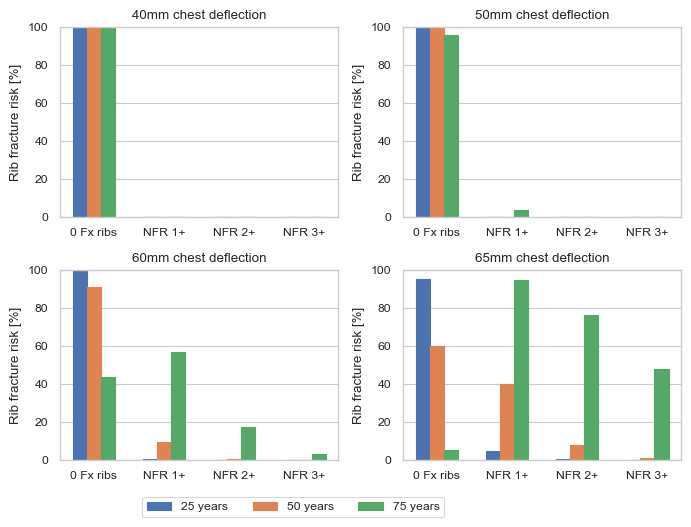

In [17]:
risk_cal=HBM_rib_risk(sim_output)
df_fx=risk_cal.injury_matrix_for_deflection("03_x_belt",[25,50,75],simData_x_Belt_offset_defl,[40,50,60,65])

B1={'width' : 0.2 ,'color':'b','alpha':1, 'edgecolor':'b'}
B2={'width' : 0.2 ,'color':'C1','alpha':1, 'edgecolor':'C1'}
B3={'width' : 0.2 ,'color':'g','alpha':1, 'edgecolor':'g'}
deflections=[40,50,60,65]
fig_ft, axs = plt.subplots(nrows=2, ncols=2,figsize=(7, 5))
i=0
for ax in axs.flat:
    br1 = np.arange(4)
    ax.bar(br1-0.2,df_fx[df_fx.deflection==deflections[i]][df_fx[df_fx.deflection==deflections[i]].age==25].iloc[0,-4:],**B1,label='25 years')
    ax.bar(br1,df_fx[df_fx.deflection==deflections[i]][df_fx[df_fx.deflection==deflections[i]].age==50].iloc[0,-4:],**B2,label='50 years')
    ax.bar(br1+0.2,df_fx[df_fx.deflection==deflections[i]][df_fx[df_fx.deflection==deflections[i]].age==75].iloc[0,-4:],**B3,label='75 years')
    ax.set_xticks(range(4), ['0 Fx ribs','NFR 1+','NFR 2+','NFR 3+'], rotation=0)
    ax.set_ylim([0,100])
    ax.grid(axis='x')
    ax.set(ylabel='Rib fracture risk [%]',title='{}mm chest deflection'.format(deflections[i]))
    i=i+1
fig_ft.legend(["25 years","50 years","75 years"], bbox_to_anchor=(0.65,0.01),ncols=3);
fig_ft.tight_layout()